# 1. Build your own convolutional neural network using pytorch

Library import

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

CNN USING PYTORCH

In [ ]:
class TeatClassfier(nn.Module):
    def __init__(self):
        super(TeatClassfier, self).__init__()
        
        '''
        In dimension:              224 * 224 * 3 
        Out dimension Conv:        224 * 224 * 32
        Out dimension MaxPooling:  112 * 112 * 32
        '''
        self.conv1= nn.Conv2d(in_channels=3, out_channels=32, kernel_size=9, stride=1, padding=4)
        self.relu1=nn.ReLU()
        self.conv2=nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2=nn.ReLU()
        self.conv3=nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        self.res1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=1, stride=1, padding=0) 
        self.batch1 = nn.BatchNorm2d(32)
        self.maxpool1 = nn.MaxPool2d(2, stride=2)
        
        
        '''
        In dimension:              112 * 112 * 32
        Out dimension Conv:        112 * 112 * 64
        Out dimension MaxPooling:  56  * 56  * 64
        '''
        self.conv4=   nn.Conv2d(in_channels=32, out_channels=64, kernel_size=9, stride=1, padding=4)
        self.relu4=   nn.ReLU()
        self.conv5 =  nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu5=    nn.ReLU()
        self.conv6=   nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.res2  = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1, stride=1, padding=0) 
        self.batch2 = nn.BatchNorm2d(64)
        self.maxpool2 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              56  * 56  * 64
        Out dimension Conv:        56  * 56  * 128
        Out dimension MaxPooling:  28  * 28  * 128
        '''
        
        self.conv7=    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        self.relu7=    nn.ReLU()
        self.conv8=    nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu8=   nn.ReLU()
        self.conv9=   nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.res3= nn.Conv2d(in_channels=64, out_channels=128, kernel_size=1, stride=1, padding=0) 
        self.batch3 = nn.BatchNorm2d(128)
        self.maxpool3 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              28  * 28  * 128
        Out dimension Conv:        28  * 28  * 256
        Out dimension MaxPooling:  14  * 14  * 256
        '''
        self.conv10=nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5, stride=1, padding=2)
        self.relu10=  nn.ReLU()
        self.conv11=   nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.relu11=    nn.ReLU()
        self.conv12=    nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        
        self.res4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=1, stride=1, padding=0) 
        self.batch4 = nn.BatchNorm2d(256)
        self.maxpool4 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              14  * 14  * 256
        Out dimension Conv:        14  * 14  * 512
        Out dimension MaxPooling:  7  * 7  * 512
        '''
        self.conv13= nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu13=  nn.ReLU()
        self.conv14=   nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu14=   nn.ReLU()
        self.conv15=  nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.res5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=1, stride=1, padding=0) 
        self.batch5 = nn.BatchNorm2d(512)
        self.maxpool5 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              7  * 7  * 512
        Out dimension Conv:        7  * 7  * 512
        Out dimension MaxPooling:  3 * 3  * 512
        '''
  
        self.conv16=    nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu16=    nn.ReLU()
        self.conv17=   nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu17=    nn.ReLU()
        self.conv18=    nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.res6 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=1, stride=1, padding=0)
        self.batch6 = nn.BatchNorm2d(512)
        self.maxpool6 = nn.MaxPool2d(3, stride=2)
        
        
        self.feedforward = nn.Sequential(
            nn.Linear(in_features=4608, out_features=512),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=4)
        )
        
        
        
    def forward(self, x): 
        
        residual = x
        # Convolution
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.conv3(x)
        # Residual
        residual = self.res1(residual)
        x += residual
        x = self.batch1(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool1(x)
        
        
        residual = x
        # Convolution
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.conv5(x)
        x = self.relu5(x)
        x = self.conv6(x)
        # Residual
        residual = self.res2(residual)
        x += residual
        x = self.batch2(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool2(x)
        
        
        residual = x
        # Convolution
        x = self.conv7(x)
        x = self.relu7(x)
        x = self.conv8(x)
        x = self.relu8(x)
        x = self.conv9(x)


        # Residual
        residual = self.res3(residual)
        x += residual
        x = self.batch3(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool3(x)
        
        
        residual = x
        # Convolution
        x = self.conv10(x)
        x = self.relu10(x)
        x = self.conv11(x)
        x = self.relu11(x)
        x = self.conv12(x)
        # Residual
        residual = self.res4(residual)
        x += residual
        x = self.batch4(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool4(x)
        
        
        residual = x
        # Convolution
        x = self.conv13(x)
        x = self.relu13(x)
        x = self.conv14(x)
        x = self.relu14(x)
        x = self.conv15(x)
        # Residual
        residual = self.res5(residual)
        x += residual
        x = self.batch5(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool5(x)
        
        
        residual = x
        # Convolution
        x = self.conv16(x)
        x = self.relu16(x)
        x = self.conv17(x)
        x = self.relu17(x)
        x = self.conv18(x)
        # Residual
        residual = self.res6(residual)
        x += residual
        x = self.batch6(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool6(x)
        
        #Flattn and feedforward layer
        x = torch.flatten(x,start_dim=1)
        x = self.feedforward(x)
        return x

# 2. Train your model using cow teat datasets (you may need to use  Google Colab (or Kaggle) with GPU to train your code) 

### (1) use torchvision.datasets.ImageFolder for the training dataset
### (2) use custom dataloader for test dataset (return image tensor and file name)

Library import

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from torchvision import transforms as T
from glob import glob
from PIL import Image
import numpy as np
from PIL import Image
import pandas as pd
import os

# 1)

Connect to Google Drive

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pin_memory = True

Define Data Agumentation for train and test data

In [ ]:
from torchvision import transforms

img_transform = transforms.Compose([
                                    transforms.RandomRotation((-20,20)),
                                    transforms.Resize((275, 275)),
                                    transforms.RandomCrop((224, 224)),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

img_transform_2 = transforms.Compose([
                                    transforms.AutoAugment(),
                                    transforms.Resize((224, 224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])



In [ ]:
class Testdata(Dataset):
    def __init__(self, directory, transforms):
        self.files = glob(directory)
        self.transform = transforms
        self.dir = directory
    def __len__(self):
        return len(self.files)
    def __getitem__(self, index):
        file = self.files[index]
        img = Image.open(file).convert('RGB')
        img = self.transform(img)
        return img, file

Define batch size for train and validation data

In [ ]:

TRAIN_BATCH_SIZE = 16
TEST_BATCH_SIZE = 8

Split data on train, test and validation data

In [ ]:
full_dataset = ImageFolder(r"/content/drive/MyDrive/Datasets/YU/Train", transform = img_transform)
test_ds = Testdata("/content/drive/MyDrive/Datasets/YU/Test/*.jpg", transforms=img_transform_2)
train_size = int(0.7 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, valid_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

train_dl = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, pin_memory=pin_memory)
valid_dl = DataLoader(valid_dataset, batch_size=TRAIN_BATCH_SIZE, pin_memory=pin_memory)
test_dl = DataLoader(test_ds, batch_size=TEST_BATCH_SIZE, pin_memory=pin_memory)

Define neural network parameters

In [ ]:
learning_rate=0.01
num_epochs = 50 
num_workers=2

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
clf=TeatClassfier().to(device)

Define optimizer and loss function

In [ ]:
opt=torch.optim.SGD(clf.parameters(),lr=learning_rate)
criterion=nn.CrossEntropyLoss()

Initialize loss lists

In [ ]:
training_loss=[]
valid_loss=[]
train_acc=[]
valid_acc=[]

val_accuracy_max=60

Fitting process

In [ ]:
for epoch in range(200):
# Training loop
    correct = 0
    for batch in train_dl: 
        X,y = batch 
        X, y = X.to(device), y.to(device) 
        yhat = clf(X) 
        loss = criterion(yhat, y) 
        # Apply backprop 
        opt.zero_grad()
        loss.backward() 
        opt.step() 
        correct += (torch.argmax(yhat, dim=1) == y).float().sum().detach().cpu()
    accuracy = 100 * correct / len(train_dataset)
    train_acc.append(accuracy)    
    print(f"Epoch:{epoch+1} training accuracy is {accuracy}")
    training_loss.append(loss.item())
    print(f"Epoch:{epoch+1} training loss is {loss.item()}")
    
    clf.eval()

# Valid loop
    correct = 0
    for batch in valid_dl:
        X, y = batch 
        X, y = X.to(device), y.to(device) 
        yhat = clf(X) 
        loss = criterion(yhat, y)
        correct += (torch.argmax(yhat, dim=1) == y).float().sum().detach().cpu()
    accuracy = 100 * correct / len(valid_dataset)
    valid_acc.append(accuracy)
    print(f"Epoch: {epoch+1}; valid accuracy is {accuracy}") 
    print(f"Epoch: {epoch+1}; valid loss is {loss.item()}")
    valid_loss.append(loss.item())


    #choose model with best validation accuracy
    if accuracy>val_accuracy_max:
        val_accuracy_max=accuracy
        with open('model_state.pt', 'wb') as f: 
             torch.save(clf.state_dict(), f) 


Epoch:1 training accuracy is 50.87064743041992
Epoch:1 training loss is 0.750474214553833
Epoch: 1; valid accuracy is 41.449275970458984
Epoch: 1; valid loss is 1.1853574514389038
Epoch:2 training accuracy is 59.0796012878418
Epoch:2 training loss is 0.447925329208374
Epoch: 2; valid accuracy is 48.98550796508789
Epoch: 2; valid loss is 1.5598220825195312
Epoch:3 training accuracy is 60.69651794433594
Epoch:3 training loss is 0.47000011801719666
Epoch: 3; valid accuracy is 53.62318801879883
Epoch: 3; valid loss is 1.2374565601348877
Epoch:4 training accuracy is 60.82089614868164
Epoch:4 training loss is 0.4106775224208832
Epoch: 4; valid accuracy is 55.36231994628906
Epoch: 4; valid loss is 1.1588057279586792
Epoch:5 training accuracy is 60.945274353027344
Epoch:5 training loss is 0.4350672960281372
Epoch: 5; valid accuracy is 57.39130401611328
Epoch: 5; valid loss is 1.0771894454956055
Epoch:6 training accuracy is 61.442787170410156
Epoch:6 training loss is 0.42151954770088196
Epoch: 

# 3. Evaluate your model using the developed software

Upload neural network for evaluation

In [ ]:
with open('model_state.pt', 'rb') as f: 
    clf.load_state_dict(torch.load(f))

Make prediction on test data

In [ ]:
test_preds = []
files = []

for batch in test_dl:
    img, fname = batch
    pred = clf(img.to(device))
    
    test_preds.extend(torch.argmax(pred, dim=1).detach().cpu())
    files.extend(np.array(fname).flatten())


df = pd.DataFrame({"imagename":files, "preds":test_preds})

df['imagename'] =df['imagename'].apply(lambda x: x.split("/")[-1])
df['preds']=df['preds'].astype('int32')
df.to_csv("submission.csv", header=None, index=None)
pd.read_csv("submission.csv")


,20200724_093921_RF_C2_PP_M.jpg,0
0,20200724_094015_RH_C2_PN_M.jpg,0
1,20200724_093940_RH_C1_PN_M.jpg,0
2,20200724_093926_LH_C1_PN_M.jpg,1
3,20200724_093930_LF_C1_PN_M.jpg,0
4,20200724_094015_LF_C2_PN_M.jpg,0
...,...,...
374,R8_0726_35_crop_LH_C2_PN_m.jpg,0
375,R9_0765_27_crop_RH_C2_PP_m.jpg,1
376,R8_0728_37_crop_LH_C2_PN_m.jpg,1
377,R9_0791_55_crop_RH_C2_PN_m.jpg,0


Model evaluation on the test data

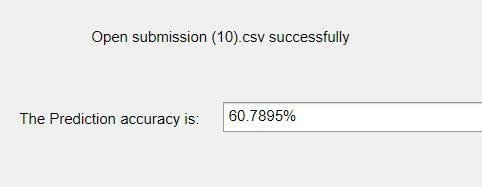

The loss function on training and validation data

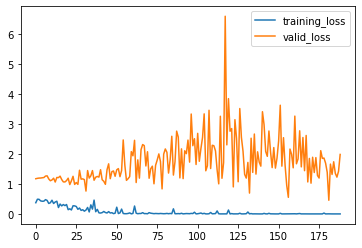

In [ ]:
plt.plot(training_loss, label='training_loss')
plt.plot(valid_loss, label='valid_loss')
plt.legend()

The accuracy function on training and validation data

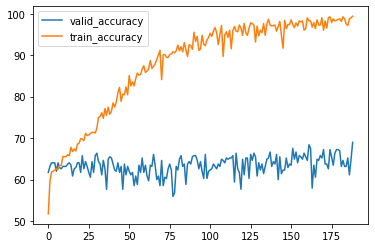

In [ ]:
plt.plot(valid_acc, label='valid_accuracy')
plt.plot(train_acc, label='train_accuracy')
plt.legend()

# 4. Compare results with [SCTL paper](https://www.mdpi.com/2076-2615/12/7/886/htm). Requirement: performance is better than VGG16: 66.8%

# 5. Write a four-page paper report using the shared LaTex template. Upload your paper to ResearchGate or Arxiv, and put your paper link here.

https://www.researchgate.net/publication/369475230_Convolutional_Neural_Network_for_Cow_Teat_Image_Classification

# 6. Grading rubric

(1). Code ------- 20 points (you also need to upload your final model as a pt file)

(2). Grammer ---- 20 points

(3). Introduction & related work --- 10 points

(4). Method  ---- 20 points

(5). Results ---- 20 points

(6). Discussion - 10 points